In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from xgboost import plot_tree
from xgboost import plot_importance
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from collections import Counter
import cv2
import os
import glob
import skimage
import numpy as np
import pandas as pd
import seaborn as sn
import preprocessing
from tqdm import tqdm
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
from skimage.transform import resize
from collections import Counter
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # Inception
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3 # InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Flatten, Activation, GlobalAveragePooling2D,Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import xgboost as xgb
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.metrics import accuracy_score, log_loss
import sklearn
import string
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score,accuracy_score,confusion_matrix
import warnings
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import  metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
w , h= 64,64 # tested with 16 , 32 , 64 , 128 pixel values
final_class = 5
w,h,final_class

(64, 64, 5)

In [3]:
def FormatDataset(dataset_src, dataset_dest, classes):
    # Making a Copy of Dataset
    new_cropped_dest = [os.path.join(dataset_dest, cls, 'CROPPED') for cls in classes];
    new_complete_dest = [os.path.join(dataset_dest, cls, 'COMPLETE') for cls in classes];
    cropped_src = [ dataset_src + "/im_" + cls + "/im_" + cls + "/CROPPED" for cls in classes ];
    complete_src = [ dataset_src + "/im_" + cls + "/im_" + cls for cls in classes ];
    for (dest1, dest2) in zip(new_cropped_dest, new_complete_dest):
        os.makedirs(dest1);
        os.makedirs(dest2);
    # Formating Cropped Images
    for (src,new_dest) in zip(cropped_src, new_cropped_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file);
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg');
                img = cv2.imread(os.path.join(src, file));
                img = cv2.resize(img, (w, h));
                img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0);
                img = cv2.blur(img, (2, 2));
                cv2.imwrite(img_des ,img);
    # Formatting Complete Images
    for (src,new_dest) in zip(complete_src, new_complete_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file);
            if file_ext == '.bmp':
                img_des = os.path.join(new_dest, filename + '.jpg');
                img = cv2.imread(os.path.join(src, file));
                img = cv2.resize(img, (256, 256));
                img = cv2.copyMakeBorder(img, 2, 2, 2, 2, cv2.BORDER_CONSTANT, value=0);
                img = cv2.blur(img, (2, 2));
                cv2.imwrite(img_des ,img);

# Source Location for Dataset
src = '../input/cervical-cancer-largest-dataset-sipakmed';
# Destination Location for Dataset
dest = './CervicalCancer';
# Image Classes
classes = ["Dyskeratotic","Koilocytotic","Metaplastic","Parabasal","Superficial-Intermediate"];
# Formatting Dataset
FormatDataset(src, dest, classes);

In [4]:
import os
import numpy as np
import cv2
from tqdm import tqdm




# Initialize lists to store data and labels
X = []
Y = []

import os
import cv2
import numpy as np

def LoadDataset(dataset_path, classes, img_size=(256, 256)):
    X, Y = [], []
    class_map = {cls: idx for idx, cls in enumerate(classes)}
    
    for cls in classes:
        class_dir = os.path.join(dataset_path, cls, 'COMPLETE')  # Load from COMPLETE folder
        if not os.path.exists(class_dir):
            print(f"Warning: {class_dir} not found.")
            continue
        
        for file in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file)
            if file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img = cv2.imread(file_path)
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                X.append(img)
                Y.append(class_map[cls])
    
    X = np.array(X, dtype=np.float32) / 255.0  # Normalize images
    Y = np.array(Y, dtype=np.int32)  # Convert labels to NumPy array
    
    print(f"Dataset Loaded: X shape = {X.shape}, Y shape = {Y.shape}")
    return X, Y

# Dataset Path
dataset_path = "./CervicalCancer"
# Image Classes
classes = ["Dyskeratotic", "Koilocytotic", "Metaplastic", "Parabasal", "Superficial-Intermediate"]

# Load Dataset
X, Y = LoadDataset(dataset_path, classes)


# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Function to preprocess the images
def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filtering
    filtered_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)
    
    # Normalize the image to range [0, 1]
    normalized_image = filtered_image / 255.0
    
    # Reshape the image to add a channel dimension
    normalized_image = normalized_image.reshape(normalized_image.shape[0], normalized_image.shape[1], 1)

    return normalized_image

# Preprocess the images
X_preprocessed = []
for i in tqdm(range(X.shape[0]), desc="Preprocessing images"):
    processed_image = preprocess_image(X[i])
    X_preprocessed.append(X[i])

# Convert the list to a numpy array
X_preprocessed = np.array(X_preprocessed)

# Save the preprocessed data and labels as .npy files
np.save('Images.npy', X_preprocessed)
np.save('Labels.npy', Y)

# Print the shapes of the saved arrays
print(f"Processed image dataset shape: {X_preprocessed.shape}")
print(f"Labels shape: {Y.shape}")


Dataset Loaded: X shape = (966, 256, 256, 3), Y shape = (966,)


Preprocessing images: 100%|██████████| 966/966 [00:02<00:00, 365.17it/s]


Processed image dataset shape: (966, 256, 256, 3)
Labels shape: (966,)


In [5]:
X = X_preprocessed 

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
y = le.transform(Y)
num_classes=  len(le.classes_)
num_classes

5

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# TRANSFER LEARNING

In [9]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.resnet50 import ResNet50 # ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.xception import Xception # Xception
from tensorflow.keras.applications.mobilenet import MobileNet # MobileNet
from tensorflow.keras.applications.nasnet import NASNetMobile # NASNetMobile
from tensorflow.keras.applications.densenet import DenseNet169 # DenseNet169
from tensorflow.keras.applications.densenet import DenseNet121 # DenseNet121
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2 # MobileNetV2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import *
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model



def FEX(name):
    input1 = Input(shape=(X.shape[1],X.shape[2],3,))
    # FE_sigma_X = Conv2D(3, kernel_size=3, padding ='same', activation='relu')(input1)
    FE_sigma_X = tf.keras.applications.VGG19(input_shape=(X.shape[1],X.shape[2],3), weights='imagenet', include_top=False)(input1)
    FE_sigma_X_OP = Flatten()(FE_sigma_X)
    model_FV = Model(inputs=input1,outputs=FE_sigma_X_OP)
    return model_FV
def extr(name,saver):
    model_FV = FEX(name)
    print(model_FV.summary())
    tf.keras.utils.plot_model(model_FV, show_shapes=True)
    X_OP = model_FV.predict(X)
    dfFE = pd.DataFrame(X_OP)
    print(X_OP.shape,Y.shape)
    np.save('X_'+saver+'_flatten.npy',X_OP)
    np.save('Y_'+saver+'_flatten.npy',Y)
    return X_OP
xop = extr('VGG19','VGG19')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg19 (Functional)              │ (None, 8, 8, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

None
31/31 ━━━━━━━━━━━━━━━━━━━━ 445s 14s/step
(966, 32768) (966,)


In [ ]:
# y= Y

# ML

  0%|          | 0/10 [00:00<?, ?it/s]

RandomForestClassifier
(1, 9)


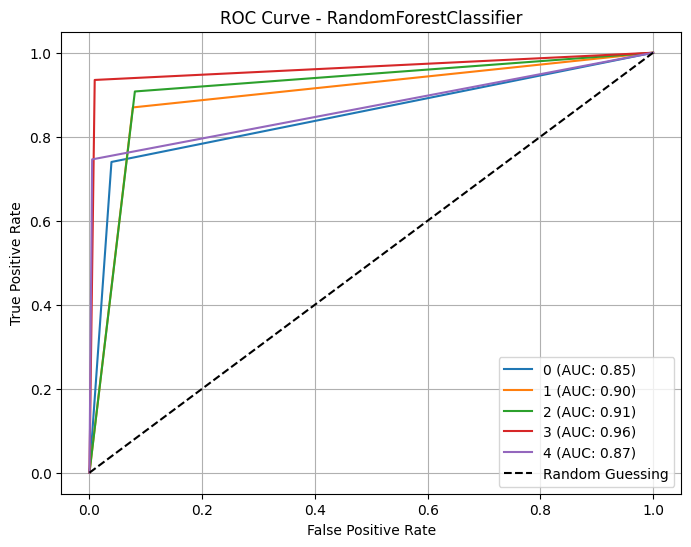

ROC AUC score: {0: 0.8504396791579406, 1: 0.8964124111182935, 2: 0.9135867689612149, 3: 0.962930587930588, 4: 0.8706349206349207}
Cohens Kappa: 0.7951057617926687
Jaccard Similarity: 0.7409807387291909
              precision    recall  f1-score   support

           0     0.8505    0.7399    0.7914       223
           1     0.7871    0.8697    0.8263       238
           2     0.8146    0.9077    0.8586       271
           3     0.9266    0.9352    0.9309       108
           4     0.9592    0.7460    0.8393       126

    accuracy                         0.8416       966
   macro avg     0.8676    0.8397    0.8493       966
weighted avg     0.8475    0.8416    0.8407       966



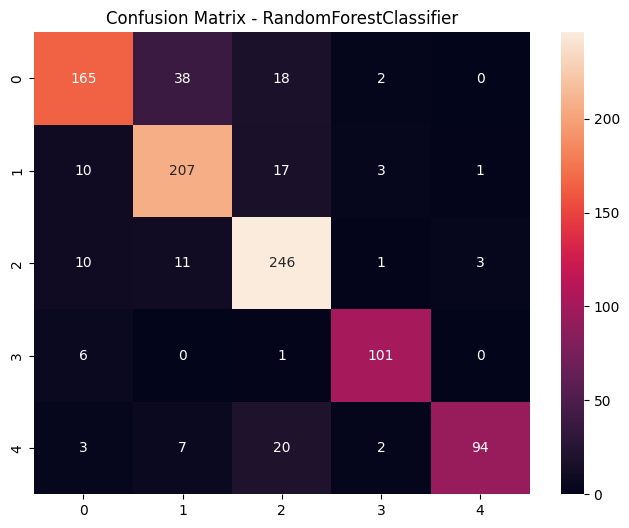

 10%|█         | 1/10 [00:01<00:14,  1.60s/it]

DecisionTreeClassifier
(2, 9)


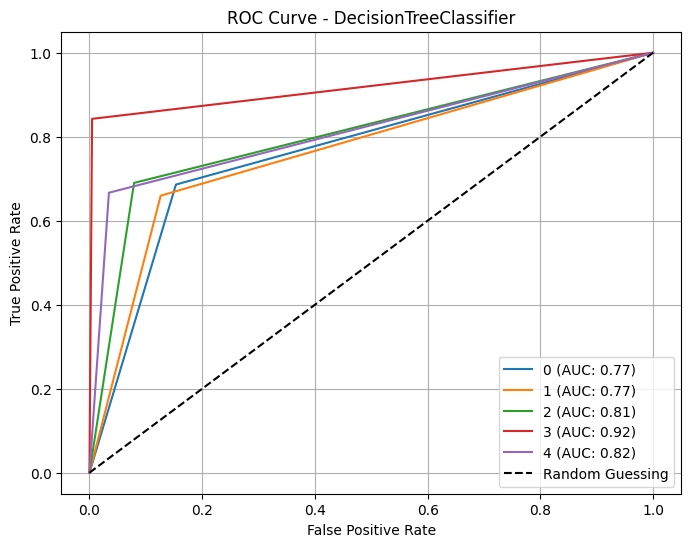

ROC AUC score: {0: 0.7663333112035199, 1: 0.766645119586296, 2: 0.8054501048607609, 3: 0.918965293965294, 4: 0.8160714285714284}
Cohens Kappa: 0.6078771402496019
Jaccard Similarity: 0.571563725249697
              precision    recall  f1-score   support

           0     0.5730    0.6861    0.6245       223
           1     0.6305    0.6597    0.6448       238
           2     0.7727    0.6900    0.7290       271
           3     0.9579    0.8426    0.8966       108
           4     0.7434    0.6667    0.7029       126

    accuracy                         0.6957       966
   macro avg     0.7355    0.7090    0.7196       966
weighted avg     0.7085    0.6957    0.6995       966



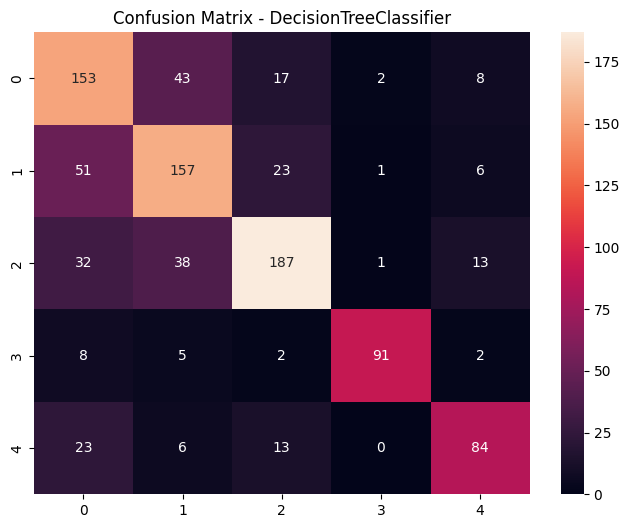

 20%|██        | 2/10 [00:10<00:47,  5.89s/it]

VotingClassifier
(3, 9)


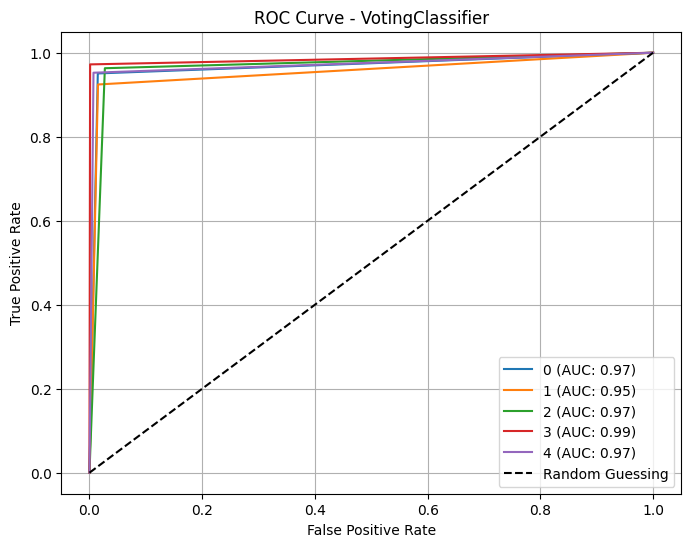

ROC AUC score: {0: 0.9679339002589188, 1: 0.9546299288946348, 2: 0.9678807507499535, 3: 0.9855283605283606, 4: 0.9726190476190476}
Cohens Kappa: 0.9360657433005398
Jaccard Similarity: 0.9123821407827156
              precision    recall  f1-score   support

           0     0.9507    0.9507    0.9507       223
           1     0.9524    0.9244    0.9382       238
           2     0.9321    0.9631    0.9474       271
           3     0.9906    0.9722    0.9813       108
           4     0.9524    0.9524    0.9524       126

    accuracy                         0.9503       966
   macro avg     0.9556    0.9525    0.9540       966
weighted avg     0.9506    0.9503    0.9503       966



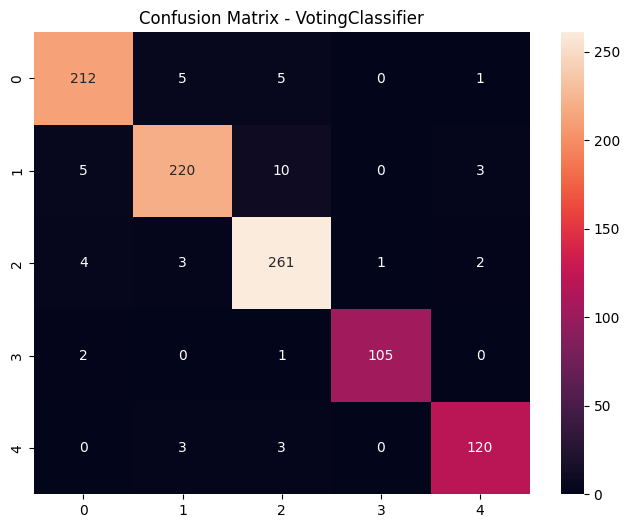

 30%|███       | 3/10 [01:23<04:15, 36.43s/it]

AdaBoostClassifier
(4, 9)


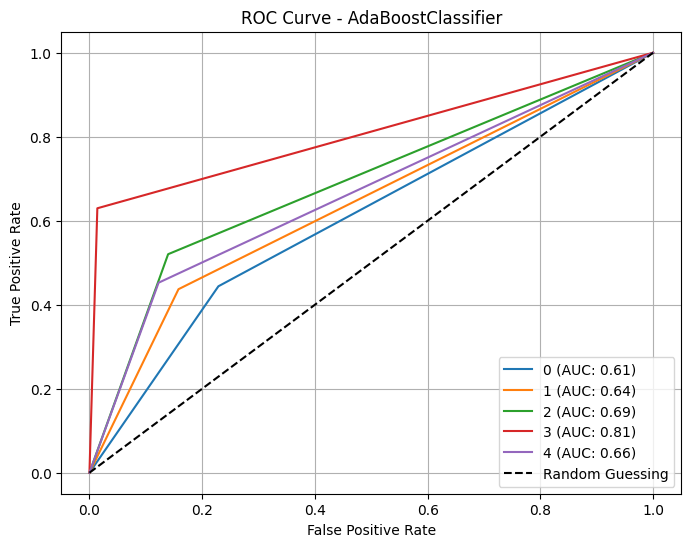

ROC AUC score: {0: 0.6075720174543874, 1: 0.6395038784744667, 2: 0.6903634288141441, 3: 0.807821807821808, 4: 0.6648809523809524}
Cohens Kappa: 0.3402917764229151
Jaccard Similarity: 0.34905061964177664
              precision    recall  f1-score   support

           0     0.3680    0.4439    0.4024       223
           1     0.4749    0.4370    0.4551       238
           2     0.5924    0.5203    0.5540       271
           3     0.8500    0.6296    0.7234       108
           4     0.3563    0.4524    0.3986       126

    accuracy                         0.4855       966
   macro avg     0.5283    0.4966    0.5067       966
weighted avg     0.5097    0.4855    0.4933       966



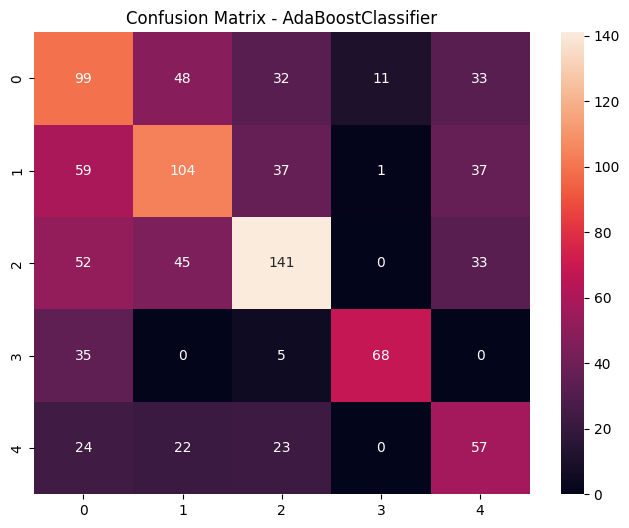

 40%|████      | 4/10 [01:35<02:41, 26.88s/it]

XGBClassifier
(5, 9)


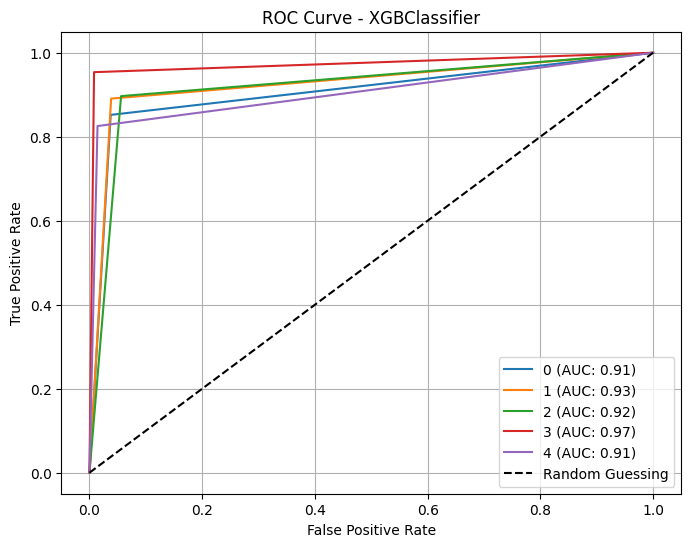

ROC AUC score: {0: 0.9071664383272275, 1: 0.926147382029735, 2: 0.9202819294379995, 3: 0.9727725977725978, 4: 0.9055555555555556}
Cohens Kappa: 0.8480008391948146
Jaccard Similarity: 0.7974221845635137
              precision    recall  f1-score   support

           0     0.8716    0.8520    0.8617       223
           1     0.8833    0.8908    0.8870       238
           2     0.8617    0.8967    0.8788       271
           3     0.9364    0.9537    0.9450       108
           4     0.8966    0.8254    0.8595       126

    accuracy                         0.8820       966
   macro avg     0.8899    0.8837    0.8864       966
weighted avg     0.8822    0.8820    0.8818       966



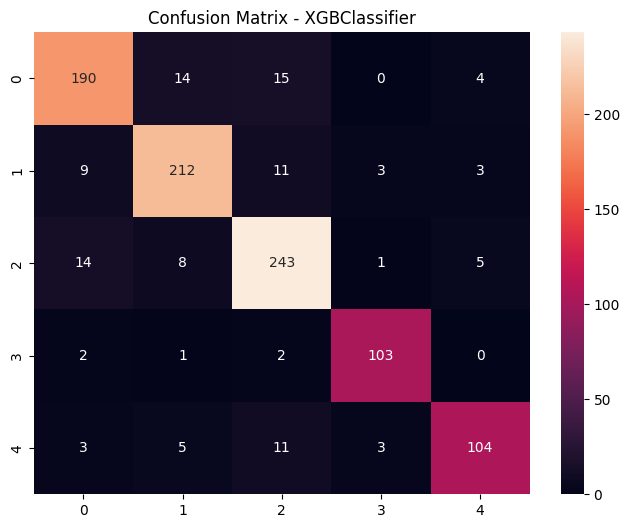

 50%|█████     | 5/10 [02:09<02:27, 29.48s/it]

KNeighborsClassifier
(6, 9)


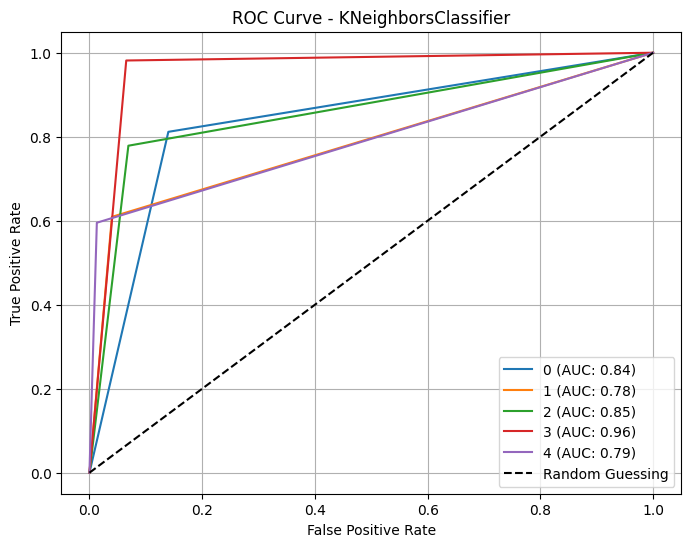

ROC AUC score: {0: 0.8358430553627578, 1: 0.7847042663219134, 2: 0.8547665188882104, 3: 0.9581067081067081, 4: 0.7910714285714286}
Cohens Kappa: 0.6716753372766793
Jaccard Similarity: 0.5903633411558468
              precision    recall  f1-score   support

           0     0.6351    0.8117    0.7126       223
           1     0.8333    0.6092    0.7039       238
           2     0.8147    0.7786    0.7962       271
           3     0.6543    0.9815    0.7852       108
           4     0.8721    0.5952    0.7075       126

    accuracy                         0.7433       966
   macro avg     0.7619    0.7552    0.7411       966
weighted avg     0.7674    0.7433    0.7414       966



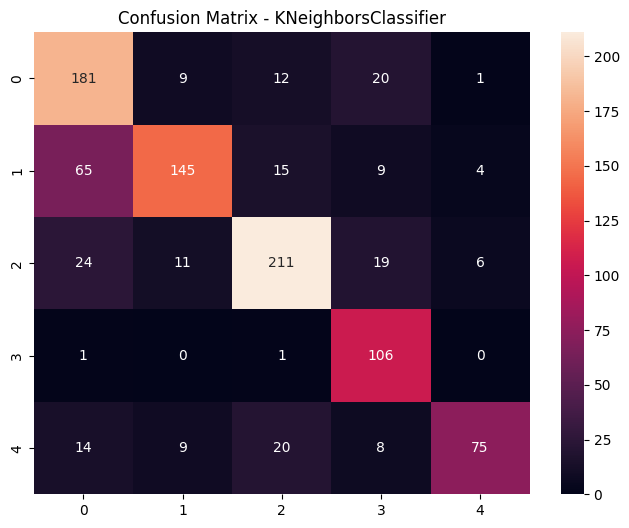

 60%|██████    | 6/10 [02:12<01:21, 20.36s/it]

GaussianNB
(7, 9)


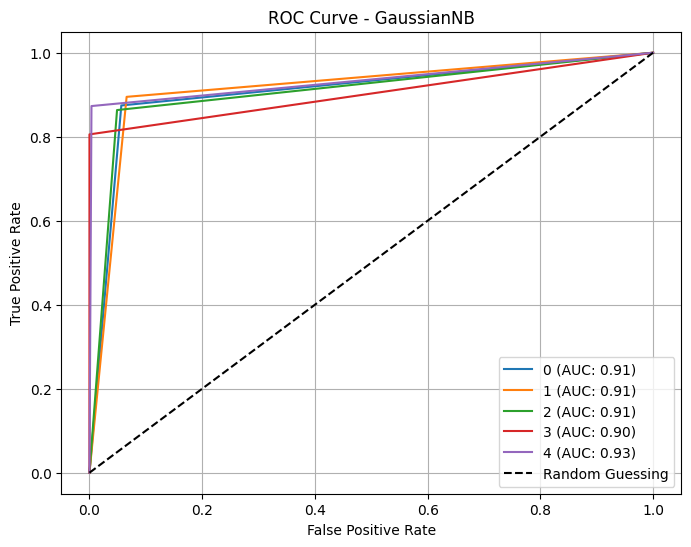

ROC AUC score: {0: 0.9089559355177472, 1: 0.9145119586296057, 2: 0.9072738856884971, 3: 0.9027777777777778, 4: 0.9347222222222222}
Cohens Kappa: 0.8300626796412369
Jaccard Similarity: 0.7812172299926491
              precision    recall  f1-score   support

           0     0.8228    0.8744    0.8478       223
           1     0.8161    0.8950    0.8537       238
           2     0.8731    0.8635    0.8683       271
           3     1.0000    0.8056    0.8923       108
           4     0.9735    0.8730    0.9205       126

    accuracy                         0.8685       966
   macro avg     0.8971    0.8623    0.8765       966
weighted avg     0.8747    0.8685    0.8695       966



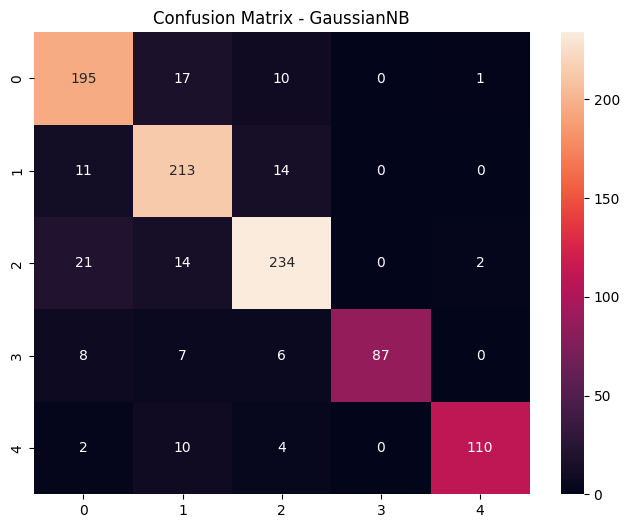

 70%|███████   | 7/10 [02:14<00:43, 14.42s/it]

LogisticRegression
(8, 9)


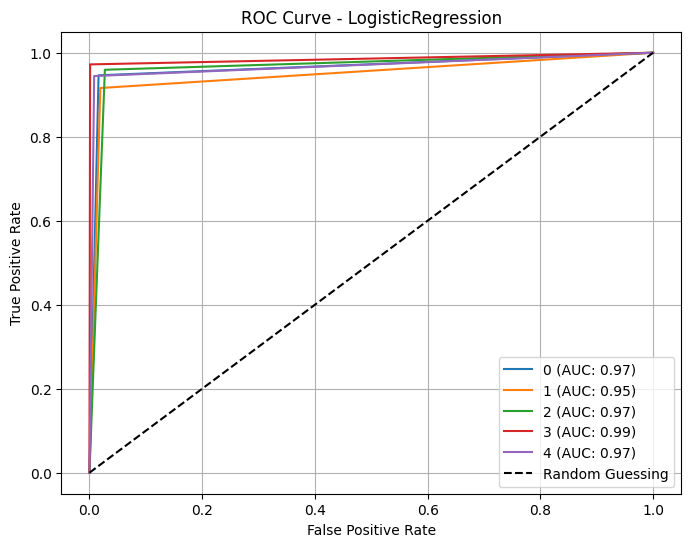

ROC AUC score: {0: 0.9650188002824568, 1: 0.9483678086619262, 2: 0.966035732299769, 3: 0.9855283605283606, 4: 0.9680555555555556}
Cohens Kappa: 0.9294091369102606
Jaccard Similarity: 0.9035086048083338
              precision    recall  f1-score   support

           0     0.9462    0.9462    0.9462       223
           1     0.9397    0.9160    0.9277       238
           2     0.9319    0.9594    0.9455       271
           3     0.9906    0.9722    0.9813       108
           4     0.9444    0.9444    0.9444       126

    accuracy                         0.9451       966
   macro avg     0.9506    0.9476    0.9490       966
weighted avg     0.9453    0.9451    0.9451       966



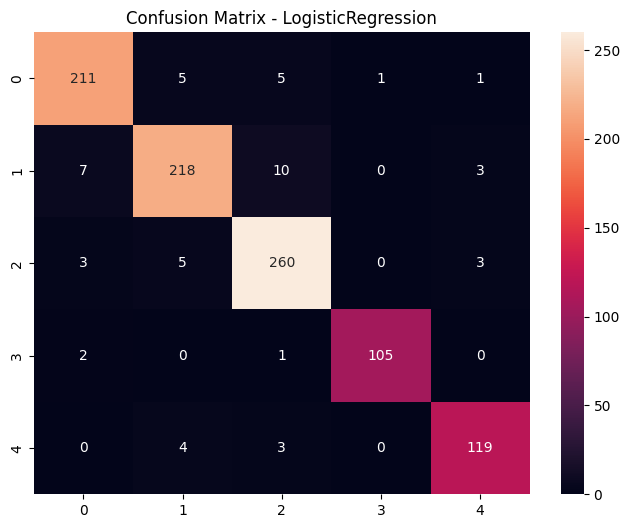

 80%|████████  | 8/10 [02:34<00:32, 16.28s/it]

SVC
(9, 9)


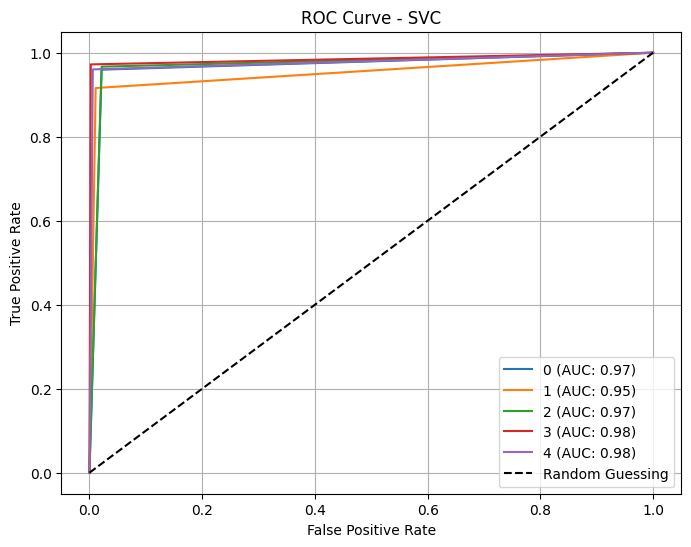

ROC AUC score: {0: 0.9690534676411833, 1: 0.9524886877828054, 2: 0.9726034670418646, 3: 0.98494560994561, 4: 0.9771825396825398}
Cohens Kappa: 0.9387578747455481
Jaccard Similarity: 0.9151739688190285
              precision    recall  f1-score   support

           0     0.9304    0.9596    0.9448       223
           1     0.9646    0.9160    0.9397       238
           2     0.9458    0.9668    0.9562       271
           3     0.9813    0.9722    0.9767       108
           4     0.9603    0.9603    0.9603       126

    accuracy                         0.9524       966
   macro avg     0.9565    0.9550    0.9555       966
weighted avg     0.9528    0.9524    0.9523       966



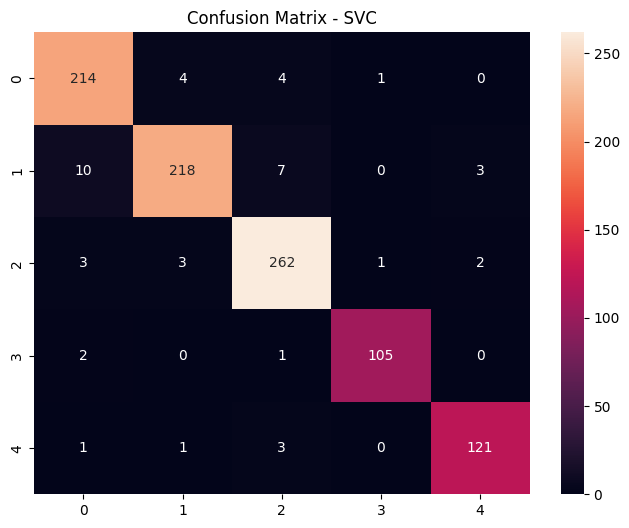

 90%|█████████ | 9/10 [03:27<00:27, 27.61s/it]

RidgeClassifier
(10, 9)


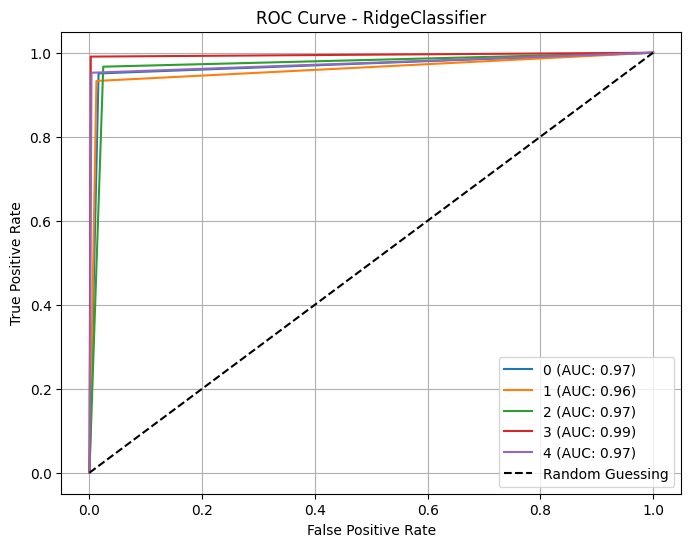

ROC AUC score: {0: 0.9672609527488246, 1: 0.9602052359405301, 2: 0.9711646181210013, 3: 0.9942048692048692, 4: 0.9744047619047619}
Cohens Kappa: 0.9427336157728645
Jaccard Similarity: 0.9227190275529426
              precision    recall  f1-score   support

           0     0.9464    0.9507    0.9485       223
           1     0.9610    0.9328    0.9467       238
           2     0.9391    0.9668    0.9527       271
           3     0.9817    0.9907    0.9862       108
           4     0.9756    0.9524    0.9639       126

    accuracy                         0.9555       966
   macro avg     0.9608    0.9587    0.9596       966
weighted avg     0.9557    0.9555    0.9555       966



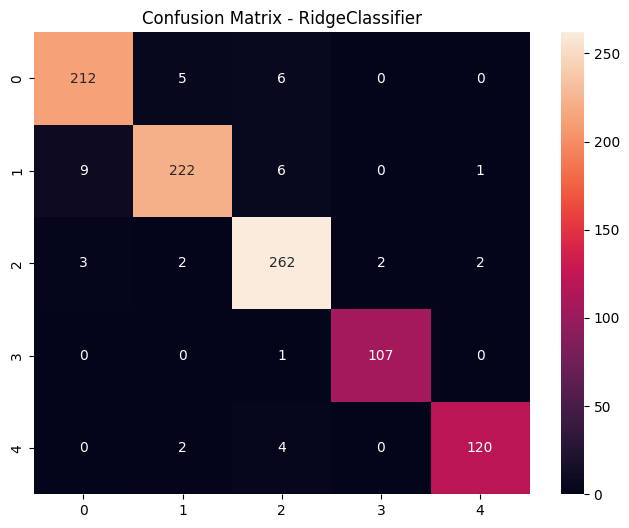

100%|██████████| 10/10 [03:28<00:00, 20.89s/it]


""


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,
    roc_auc_score, confusion_matrix, classification_report, cohen_kappa_score, jaccard_score
)
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Global DataFrame for results
crdf = pd.DataFrame(columns=[
    'Model', 'Accuracy', 'Precision', 'Recall or Sensitivity', 'F1 Score', 
    'Specificity', 'AUC', "Cohen's Kappa", 'Jaccard Similarity'
])

def run(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Ensure results are stored in crdf
    onevsall(y_test, y_pred, clf.__class__.__name__)  
    return visualise(y_test, y_pred, clf.__class__.__name__), clf


def RNDF(X_train, y_train, sel_x, y):
    for clf in tqdm(models_f1):
        print(clf.__class__.__name__)
        run(clf, X_train, y_train, sel_x, y)
    return rdf

def multiclass_roc_auc_score(y_test, y_pred, name):
    lb = LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    y_pred = lb.transform(y_pred)
    
    roc_auc_values = {}
    plt.figure(figsize=(8, 6))
    for idx, label in enumerate(lb.classes_):
        fpr, tpr, _ = roc_curve(y_test[:, idx], y_pred[:, idx])
        roc_auc = auc(fpr, tpr)
        roc_auc_values[label] = roc_auc
        plt.plot(fpr, tpr, label=f'{label} (AUC: {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig(f'ROC_AUC_{name}.jpeg')
    plt.show()
    return roc_auc_values

def onevsall(y_true, y_pred, model_name):
    global crdf
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    sp = recall_score(y_true, y_pred, average='macro', pos_label=0, zero_division=0)
    roc_auc = roc_auc_score(y_true, LabelBinarizer().fit_transform(y_pred), average='macro', multi_class='ovr')
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    jaccard_sim = jaccard_score(y_true, y_pred, average='macro', zero_division=0)
    
    crdf = pd.concat([crdf, pd.DataFrame({
        'Model': [model_name], 'Accuracy': [acc], 'Precision': [pre], 'Recall or Sensitivity': [rec],
        'F1 Score': [f1], 'Specificity': [sp], 'AUC': [roc_auc], "Cohen's Kappa": [cohen_kappa], 'Jaccard Similarity': [jaccard_sim]
    })], ignore_index=True)
    print(crdf.shape)
    return crdf

def visualise(y_true, y_pred, model_name):
    ConfusionM = confusion_matrix(y_true, y_pred)
    print('ROC AUC score:', multiclass_roc_auc_score(y_true, y_pred, model_name))
    print('Cohens Kappa:', cohen_kappa_score(y_true, y_pred))
    print('Jaccard Similarity:', jaccard_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred, digits=4))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(ConfusionM, annot=True, fmt='g', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.savefig(f'CM_{model_name}.jpg')
    plt.show()

    

models_f1 = []

# Random Forest with adjusted hyperparameters
models_f1.append(RandomForestClassifier(n_estimators=20, max_depth=5, criterion='entropy', random_state=42))

# Decision Tree with max depth to prevent overfitting
models_f1.append(DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42))

# Voting Classifier with lightweight components
models_f1.append(VotingClassifier(estimators=[
    ('lr', LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)),
    ('svc', svm.SVC(kernel='linear', probability=True, random_state=42))
], voting='soft'))

# AdaBoost with reduced learning rate and more estimators
models_f1.append(AdaBoostClassifier(n_estimators=10, learning_rate=0.8, random_state=42))

# XGBoost with fine-tuned hyperparameters
models_f1.append(xgb.XGBClassifier(max_depth=3, n_estimators=10, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss'))

# Adding lightweight classifiers
# k-Nearest Neighbors
models_f1.append(KNeighborsClassifier(n_neighbors=3, weights='uniform'))

# Naive Bayes
models_f1.append(GaussianNB())

# Logistic Regression with default settings for comparison
models_f1.append(LogisticRegression(random_state=42))

# Support Vector Machine with linear kernel (lightweight)
models_f1.append(svm.SVC(kernel='linear', probability=True, random_state=42))

# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
models_f1.append(RidgeClassifier(alpha=1.0, random_state=42))
# Initialize global DataFrame for results
rdf = pd.DataFrame()

# Example usage of RNDF function (assuming X_train, y_train, sel_x, y are defined)
# rdf = RNDF(X_train, y_train, sel_x, y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xop,y,test_size=0.2, random_state=1) 
rdf = pd.DataFrame()
from sklearn import datasets, metrics, model_selection, svm
RNDF(X_train, y_train,xop,y)


In [12]:
print(crdf)
print(crdf.shape)


                    Model  Accuracy  Precision  Recall or Sensitivity  \
0  RandomForestClassifier  0.841615   0.867589               0.839725   
1  DecisionTreeClassifier  0.695652   0.735508               0.709012   
2        VotingClassifier  0.950311   0.955629               0.952549   
3      AdaBoostClassifier  0.485507   0.528321               0.496645   
4           XGBClassifier  0.881988   0.889902               0.883711   
5    KNeighborsClassifier  0.743271   0.761901               0.755244   
6              GaussianNB  0.868530   0.897092               0.862288   
7      LogisticRegression  0.945135   0.950551               0.947646   
8                     SVC  0.952381   0.956502               0.954987   
9         RidgeClassifier  0.955487   0.960759               0.958671   

   F1 Score  Specificity       AUC  Cohen's Kappa  Jaccard Similarity  
0  0.849303     0.839725  0.898801       0.795106            0.740981  
1  0.719556     0.709012  0.814693       0.607877   

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [14]:
EPOCHS = 10

In [15]:
def display_training_curves(training, validation, yaxis):
    if yaxis == "loss":
        ylabel = "Loss"
        title = "Loss vs. Epochs"
    else:
        ylabel = "Accuracy"
        title = "Accuracy vs. Epochs"
        
    fig = go.Figure()
        
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))
    
    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()

# VGG19-Artifical Network

In [16]:
final_class = 5

In [17]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Flatten , Conv1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import UpSampling2D
def model_b():
    inp1 = Input(shape=(xop.shape[1],))
    i1 = Dense(1024, activation='relu')(inp1)
#     i1 = Reshape((50,64))(i1)
#     i1 = Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))(i1)
    i1 = Dense(256, activation='relu')(i1)
    i1 = Dense(64, activation='relu')(i1)
    output = Dense(final_class, activation='sigmoid')(i1)
    model = Model(inputs=inp1, outputs=output)
    return model
md = model_b()
md.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    33,555,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,834,629 (129.07 MB)

 Trainable params: 33,834,629 (129.07 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from sklearn.preprocessing import OneHotEncoder
Y = y.reshape(y.shape[0],1)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(Y)
Y = enc.transform(Y).toarray()
Y.shape

(966, 5)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xop,Y, random_state=42, test_size=0.2)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))

Train data    :(772, 32768)
Test data     :(194, 32768)
Train Output  :(772, 5)
Test Output   :(194, 5)


In [20]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
def LR_verify():
        model = model_b()
        METRICS = [
               'categorical_accuracy'
        ]  
        model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                filepath='.weights.h5',
                save_weights_only=True,
                monitor='recall',
                mode='max',
                save_best_only=True)
        model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=METRICS
            )
        history = model.fit(X_train, y_train,
                            epochs=EPOCHS,
                            verbose=1,
                            shuffle = True,
                            validation_data=(X_test,y_test),
                           callbacks=[model_checkpoint_callback])
        return model,history
model,history= LR_verify()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 803ms/step - categorical_accuracy: 0.3065 - loss: 1.5708 - val_categorical_accuracy: 0.5567 - val_loss: 1.0996
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 798ms/step - categorical_accuracy: 0.5707 - loss: 1.0403 - val_categorical_accuracy: 0.5619 - val_loss: 1.0179
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 790ms/step - categorical_accuracy: 0.7365 - loss: 0.7409 - val_categorical_accuracy: 0.7474 - val_loss: 0.8111
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 803ms/step - categorical_accuracy: 0.8036 - loss: 0.5800 - val_categorical_accuracy: 0.7010 - val_loss: 0.7178
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 788ms/step - categorical_accuracy: 0.8852 - loss: 0.4086 - val_categorical_accuracy: 0.7216 - val_loss: 0.6914
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 790ms/step - categorical_accuracy: 0.9060 - loss: 0.3505 - val_categorical_accuracy: 0.7629 - val_loss: 0.5862
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 802ms/step - categorical_accuracy: 0.948

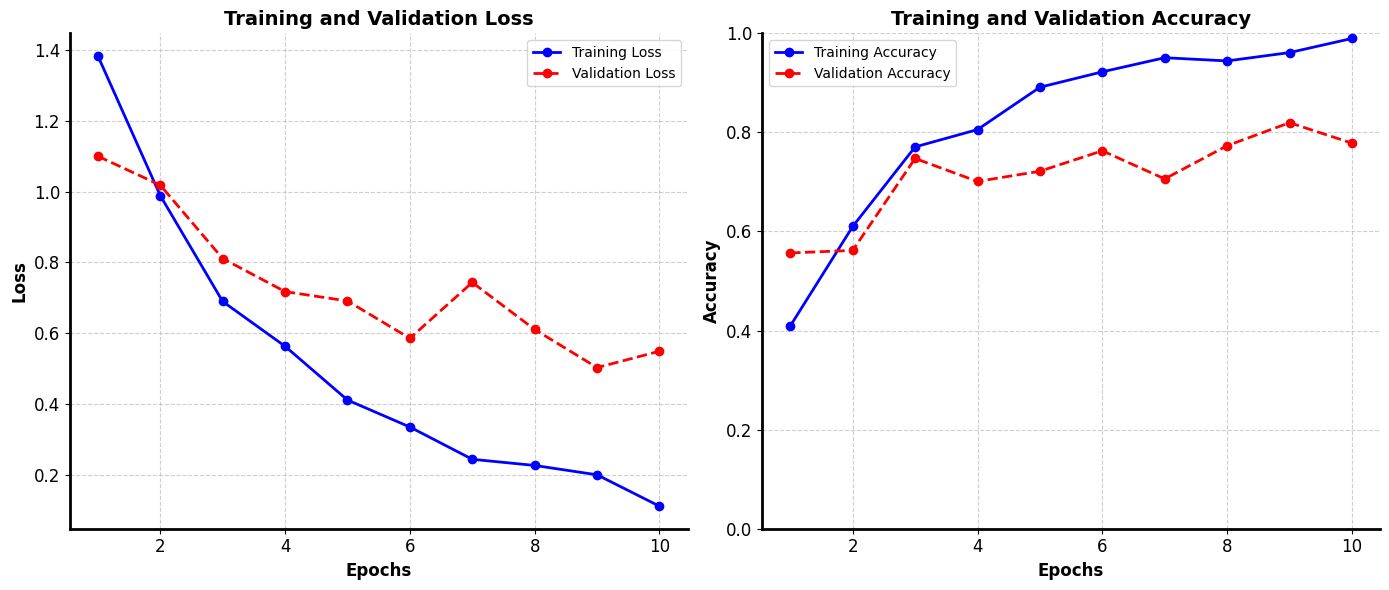

In [21]:
# Extract training history data
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create a figure with 2 subplots: one for loss and one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Loss
axs[0].plot(epochs_range, loss, label='Training Loss', color='b', marker='o', linestyle='-', linewidth=2)
axs[0].plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='o', linestyle='--', linewidth=2)
axs[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plotting Accuracy
axs[1].plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o', linestyle='-', linewidth=2)
axs[1].plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='o', linestyle='--', linewidth=2)
axs[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Make sure to bold the ticks and gridlines
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('training_loss_accuracy.png', dpi=300)
plt.show()


In [22]:
names  = ['Dyskeratotic',

'Koilocytotic',

'Metaplastic',

'Parabasal',
         'Superficial-Intermediate']

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
                          precision    recall  f1-score   support

            Dyskeratotic     0.9537    0.9238    0.9385       223
            Koilocytotic     0.9012    0.9580    0.9287       238
             Metaplastic     0.9845    0.9373    0.9603       271
               Parabasal     0.9145    0.9907    0.9511       108
Superficial-Intermediate     0.9508    0.9206    0.9355       126

                accuracy                         0.9431       966
               macro avg     0.9409    0.9461    0.9428       966
            weighted avg     0.9446    0.9431    0.9432       966




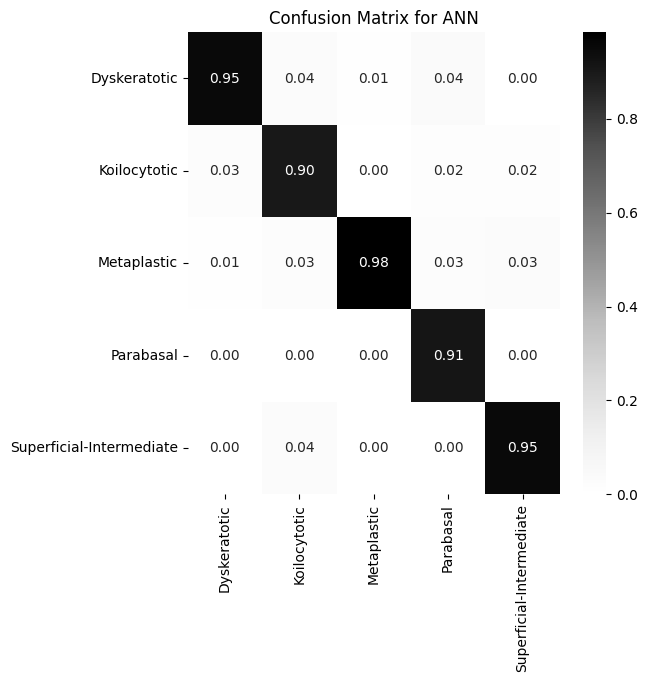

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ANN,0.943064,0.926904,0.892049,0.953704,0.923767,0.938497,0.901186,0.957983,0.928717,0.984496,0.937269,0.960302,0.91453,0.990741,0.951111,0.95082,0.920635,0.935484


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score, jaccard_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Global DataFrame to store results (shared with machine learning models)
crdf = pd.DataFrame()

def visualise(y_true, y_pred, name, model_name):
    ConfusionM = confusion_matrix(y_true, y_pred)
    
    # Print classification report
    print(classification_report(y_true, y_pred, target_names=name, digits=4))
    print()

    # Plot confusion matrix heatmap
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(ConfusionM / ConfusionM.astype(float).sum(axis=0),
                annot=True, fmt='0.2f', cmap='Greys', 
                xticklabels=name, yticklabels=name)
    plt.title('Confusion Matrix for ' + model_name)
    plt.savefig('CM_' + model_name + '.jpg')
    plt.show()

    # Calculate various metrics
    accuracy = accuracy_score(y_true, y_pred)
    cohen_kappa = cohen_kappa_score(y_true, y_pred)
    jaccard_sim = jaccard_score(y_true, y_pred, average='macro')

    # Append results to global DataFrame
    global crdf
    temp_df = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Cohen\'s Kappa': [cohen_kappa],
        'Jaccard Similarity': [jaccard_sim]
    })

    # Append classification metrics for each class (Precision, Recall, F1-Score)
    report = classification_report(y_true, y_pred, target_names=name, output_dict=True)
    for label in name:
        temp_df[f'{label}_Precision'] = report[label]['precision']
        temp_df[f'{label}_Recall'] = report[label]['recall']
        temp_df[f'{label}_F1-Score'] = report[label]['f1-score']

    crdf = pd.concat([crdf, temp_df], ignore_index=True)

# Example prediction function for deep learning model
def pred(X, Y):
    yhat = model.predict(X)
    yhat = enc.inverse_transform(yhat)
    y_real = enc.inverse_transform(Y)
    return y_real, yhat

# Example usage for the deep learning model
yt, yp = pred(xop, Y)  # Replace 'xop' and 'Y' with your actual test data and labels

visualise(yt, yp, names, 'ANN')  # 'ANN' for Artificial Neural Network or any other model name

# The `crdf` DataFrame will now include results from both ML and DL models.
crdf


# DNN

In [24]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Flatten , Conv1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import UpSampling2D
def model_b():
    inp1 = Input(shape=(xop.shape[1],))
    i1 = Dense(2048, activation='relu')(inp1)
    i1 = Dense(1024, activation='relu')(i1)
    i1 = Dense(1024, activation='relu')(i1)
    i1 = Dense(512, activation='relu')(i1)
    i1 = Dense(512, activation='relu')(i1)
#     i1 = Reshape((50,64))(i1)
#     i1 = Bidirectional(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))(i1)
    i1 = Dense(256, activation='relu')(i1)
    i1 = Dense(64, activation='relu')(i1)
    output = Dense(final_class, activation='sigmoid')(i1)
    model = Model(inputs=inp1, outputs=output)
    return model
md = model_b()
md.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2048)           │    67,110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,194,245 (271.58 MB)

 Trainable params: 71,194,245 (271.58 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model,history= LR_verify()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - categorical_accuracy: 0.2947 - loss: 1.5137 - val_categorical_accuracy: 0.4742 - val_loss: 1.2505
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - categorical_accuracy: 0.5438 - loss: 1.1323 - val_categorical_accuracy: 0.5515 - val_loss: 1.3144
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - categorical_accuracy: 0.6463 - loss: 0.9433 - val_categorical_accuracy: 0.6546 - val_loss: 0.9195
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - categorical_accuracy: 0.7138 - loss: 0.7262 - val_categorical_accuracy: 0.6907 - val_loss: 0.8774
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.7821 - loss: 0.5974 - val_categorical_accuracy: 0.6649 - val_loss: 0.8059
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.8918 - loss: 0.3382 - val_categorical_accuracy: 0.7371 - val_loss: 0.7165
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - categorical_accuracy: 0.8763 - loss: 0.3571 - va

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step
                          precision    recall  f1-score   support

            Dyskeratotic     1.0000    0.9892    0.9946       185
            Koilocytotic     0.9897    1.0000    0.9948       193
             Metaplastic     0.9954    0.9954    0.9954       216
               Parabasal     1.0000    1.0000    1.0000        85
Superficial-Intermediate     1.0000    1.0000    1.0000        93

                accuracy                         0.9961       772
               macro avg     0.9970    0.9969    0.9970       772
            weighted avg     0.9961    0.9961    0.9961       772




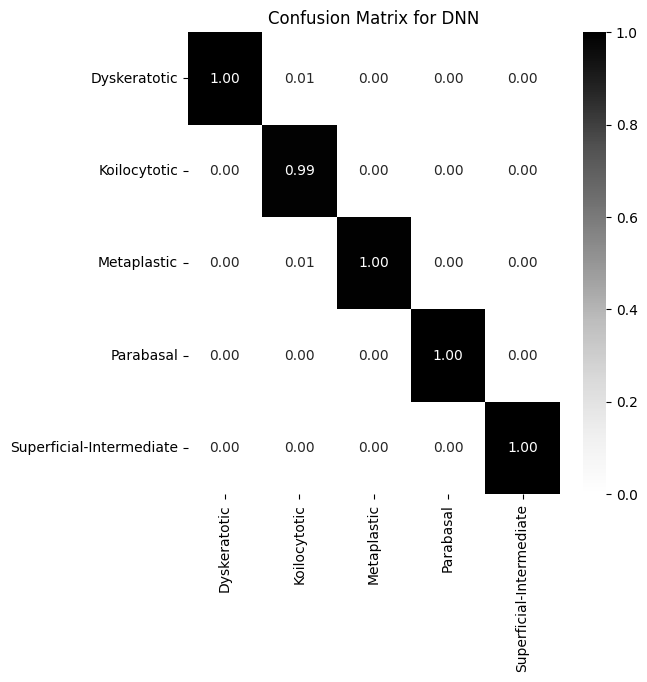

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ANN,0.943064,0.926904,0.892049,0.953704,0.923767,0.938497,0.901186,0.957983,0.928717,0.984496,0.937269,0.960302,0.91453,0.990741,0.951111,0.95082,0.920635,0.935484
1,DNN,0.996114,0.994987,0.993943,1.000000,0.989189,0.994565,0.989744,1.000000,0.994845,0.995370,0.995370,0.995370,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000


In [26]:
yt,yp = pred(X_train,y_train)
visualise(yt, yp,names, 'DNN')  # 'ANN' for Artificial Neural Network or any other model name

# The `crdf` DataFrame will now include results from both ML and DL models.
crdf



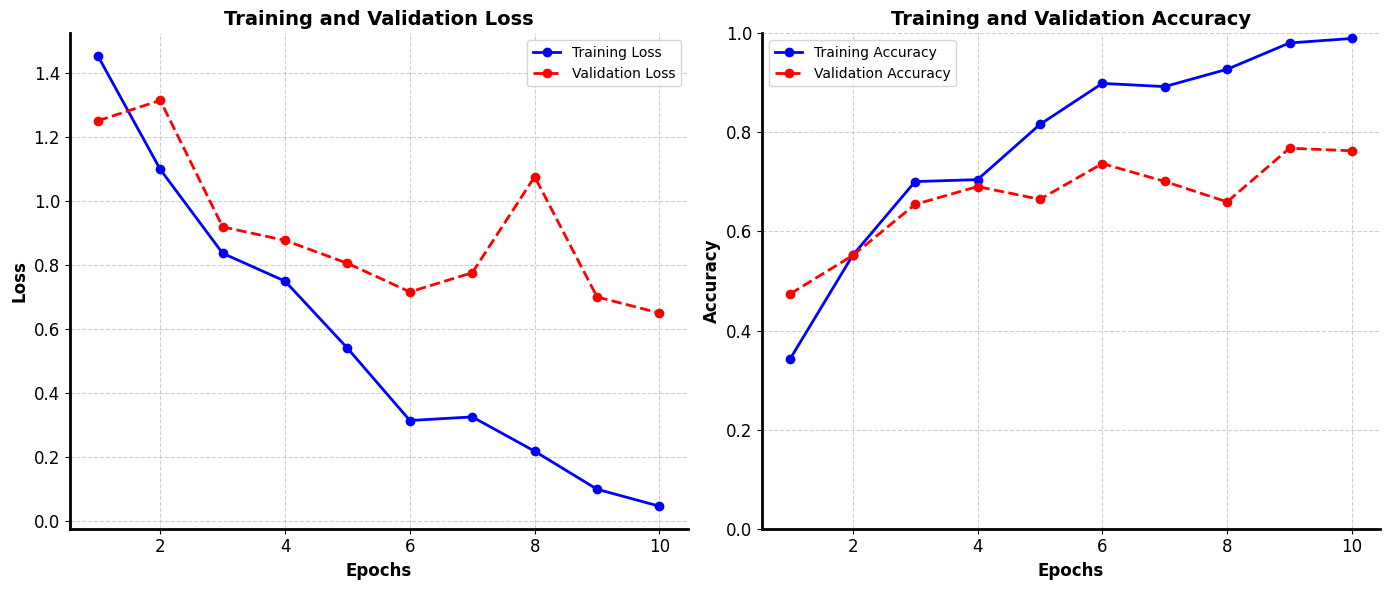

In [27]:
# Extract training history data
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create a figure with 2 subplots: one for loss and one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Loss
axs[0].plot(epochs_range, loss, label='Training Loss', color='b', marker='o', linestyle='-', linewidth=2)
axs[0].plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='o', linestyle='--', linewidth=2)
axs[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plotting Accuracy
axs[1].plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o', linestyle='-', linewidth=2)
axs[1].plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='o', linestyle='--', linewidth=2)
axs[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Make sure to bold the ticks and gridlines
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('training_loss_accuracy.png', dpi=300)
plt.show()


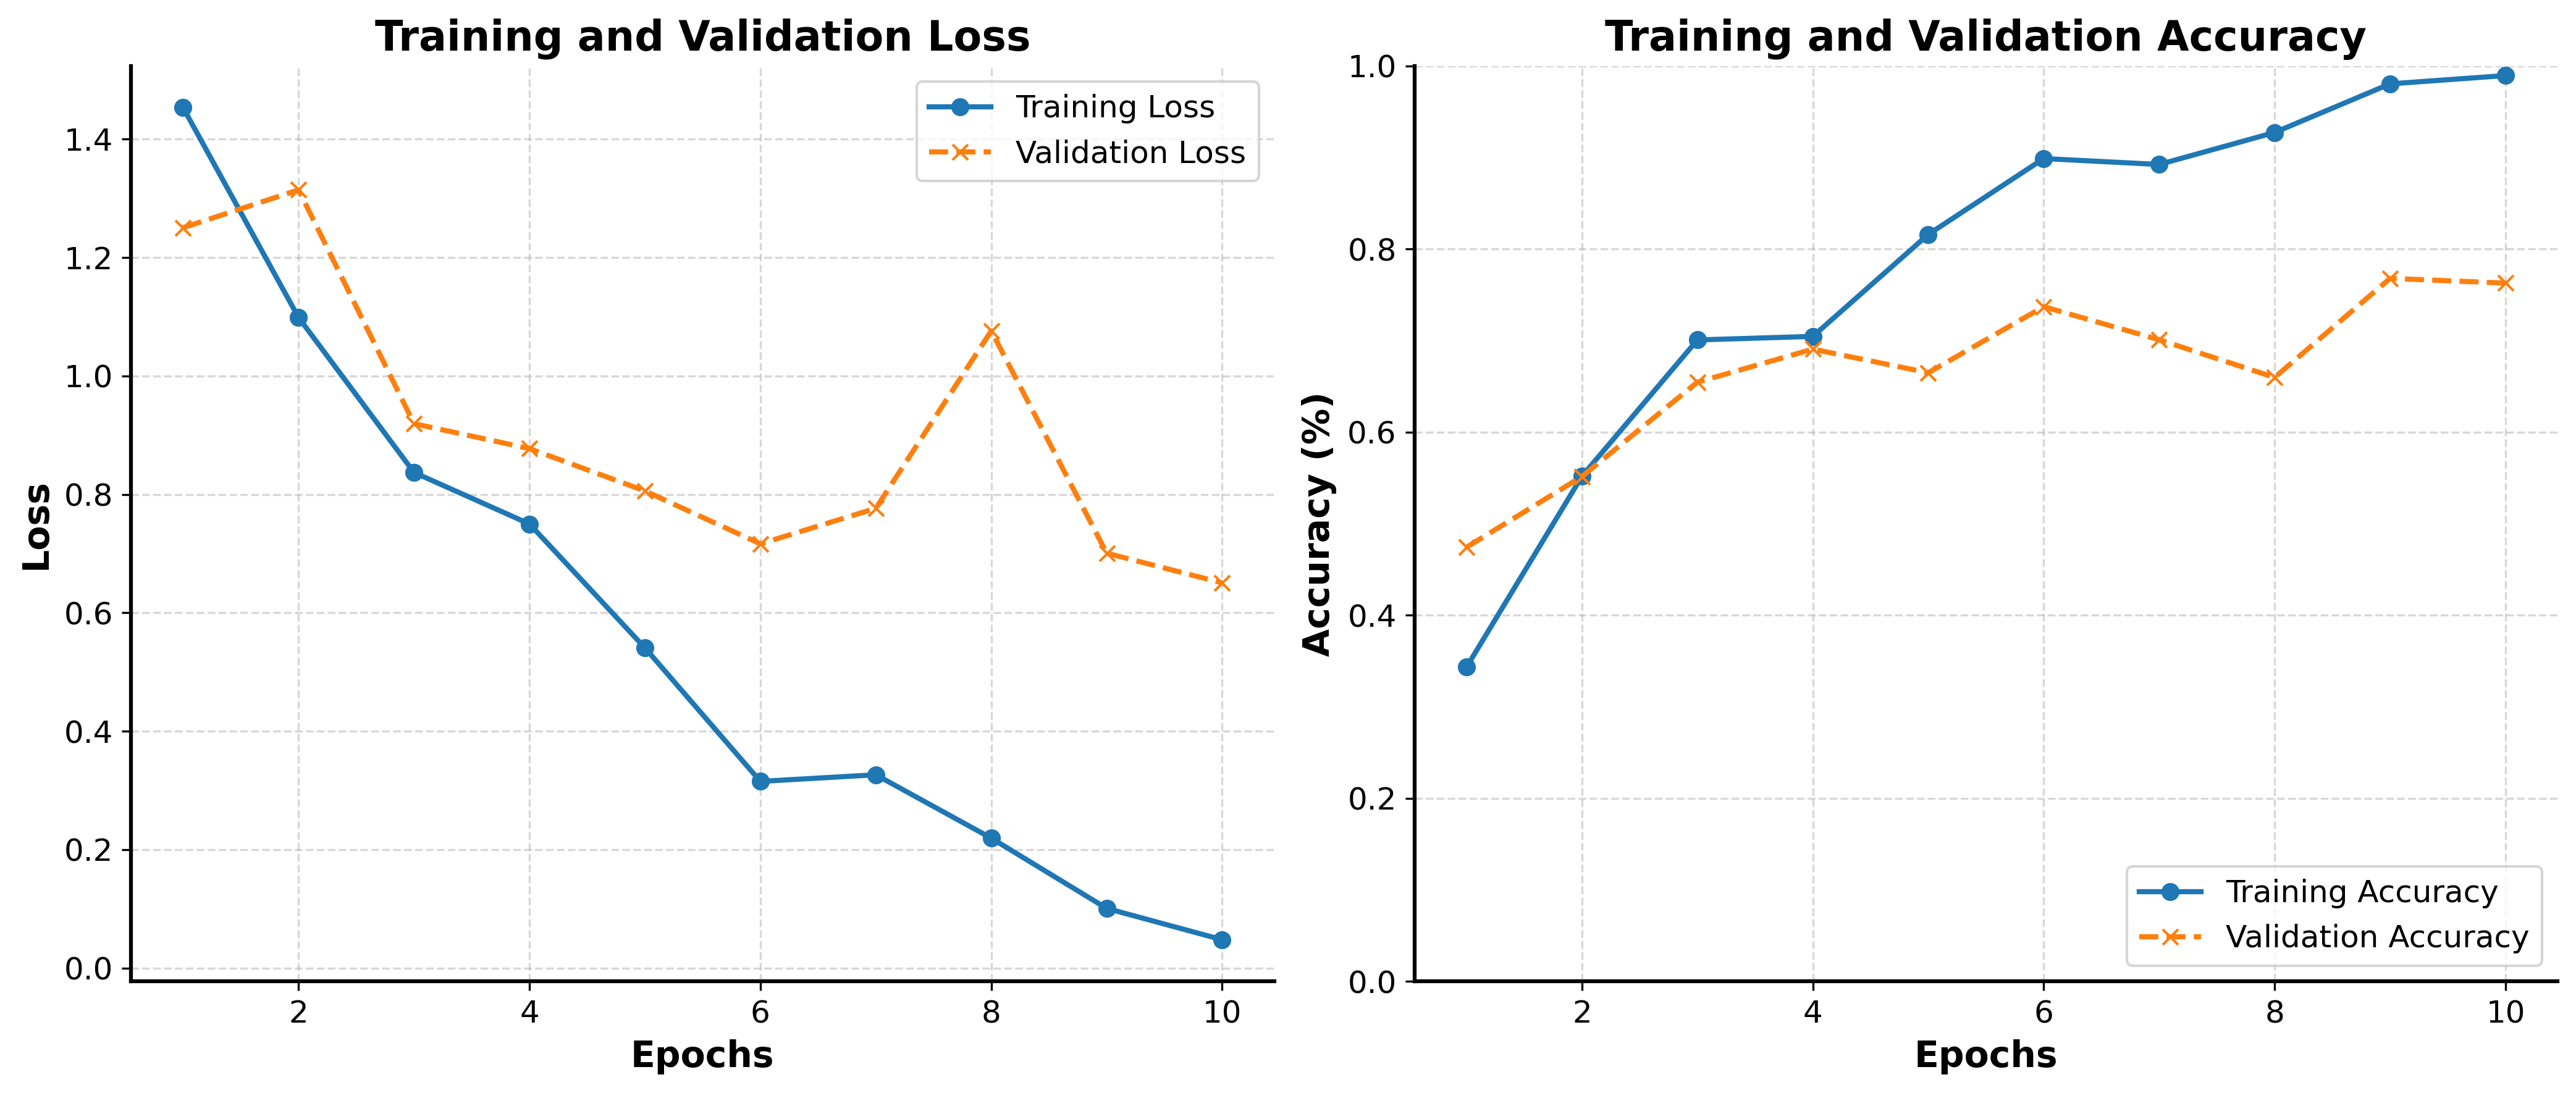

In [28]:
import matplotlib.pyplot as plt

# Extract training history data
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create a figure with 2 subplots: one for loss and one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 6), dpi=300)

# Set a professional color palette
colors = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# Plotting Loss
axs[0].plot(epochs_range, loss, label='Training Loss', color=colors[0], marker='o', linestyle='-', linewidth=2, markersize=6)
axs[0].plot(epochs_range, val_loss, label='Validation Loss', color=colors[1], marker='x', linestyle='--', linewidth=2, markersize=6)
axs[0].set_title('Training and Validation Loss', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=14, fontweight='bold')
axs[0].set_ylabel('Loss', fontsize=14, fontweight='bold')
axs[0].legend(loc='upper right', fontsize=12)
axs[0].grid(True, linestyle='--', alpha=0.5)

# Plotting Accuracy
axs[1].plot(epochs_range, acc, label='Training Accuracy', color=colors[0], marker='o', linestyle='-', linewidth=2, markersize=6)
axs[1].plot(epochs_range, val_acc, label='Validation Accuracy', color=colors[1], marker='x', linestyle='--', linewidth=2, markersize=6)
axs[1].set_title('Training and Validation Accuracy', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=14, fontweight='bold')
axs[1].set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
axs[1].set_ylim(0, 1)  # Set accuracy range between 0 and 100
axs[1].legend(loc='lower right', fontsize=12)
axs[1].grid(True, linestyle='--', alpha=0.5)

# Make sure to bold the ticks and gridlines, remove top and right spines
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

# Adjust layout to prevent overlap and display the plot
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('training_loss_accuracy_academic.png', dpi=300)
plt.show()


# CNN

In [29]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Flatten , Conv1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,MaxPooling1D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import UpSampling2D
def model_b():
    inp1 = Input(shape=(xop.shape[1],))
    i1 = Dense(2048, activation='relu')(inp1)
    i1 = Dense(1024, activation='relu')(i1)
    i1 = Dense(50*64, activation='relu')(i1)
    i1 = Reshape((50,64))(i1)
    i1 = tf.keras.layers.Conv1D(32, 3, activation='relu')(i1)
    i1 = Flatten()(i1)
    i1 = Dense(256, activation='relu')(i1)
    i1 = Dense(64, activation='relu')(i1)
    output = Dense(final_class, activation='sigmoid')(i1)
    model = Model(inputs=inp1, outputs=output)
    return model
md = model_b()
md.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2048)           │    67,110,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3200)           │     3,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 48, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       393,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,905,509 (278.11 MB)

 Trainable params: 72,905,509 (278.11 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model,history= LR_verify()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.3075 - loss: 1.4874 - val_categorical_accuracy: 0.6082 - val_loss: 1.0695
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.6230 - loss: 1.0274 - val_categorical_accuracy: 0.6856 - val_loss: 0.8418
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.7363 - loss: 0.7159 - val_categorical_accuracy: 0.7423 - val_loss: 0.7222
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.7891 - loss: 0.5987 - val_categorical_accuracy: 0.7010 - val_loss: 0.7084
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.8641 - loss: 0.3727 - val_categorical_accuracy: 0.7474 - val_loss: 0.6767
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - categorical_accuracy: 0.9049 - loss: 0.2929 - val_categorical_accuracy: 0.7938 - val_loss: 0.5590
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - categorical_accuracy: 0.9523 - loss: 0.1696 - va

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
                          precision    recall  f1-score   support

            Dyskeratotic     1.0000    1.0000    1.0000       185
            Koilocytotic     1.0000    0.9896    0.9948       193
             Metaplastic     1.0000    1.0000    1.0000       216
               Parabasal     0.9659    1.0000    0.9827        85
Superficial-Intermediate     1.0000    0.9892    0.9946        93

                accuracy                         0.9961       772
               macro avg     0.9932    0.9958    0.9944       772
            weighted avg     0.9962    0.9961    0.9961       772




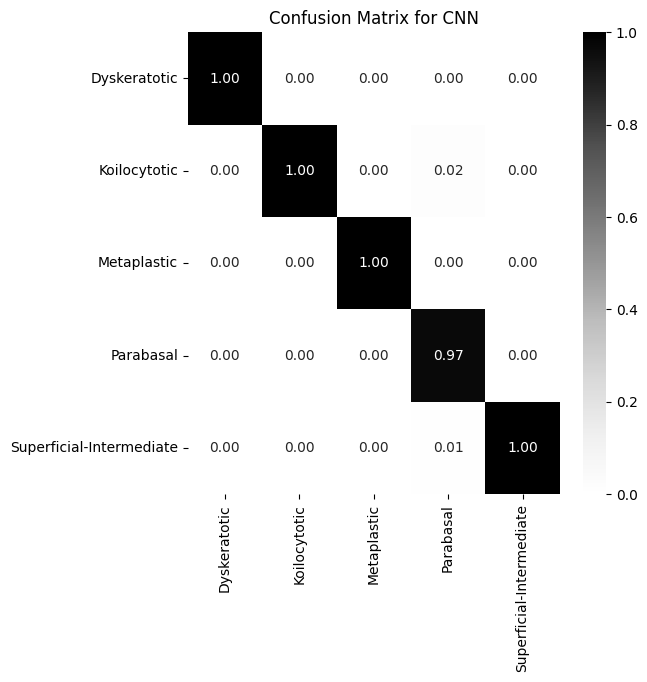

,Model,Accuracy,Cohen's Kappa,Jaccard Similarity,Dyskeratotic_Precision,Dyskeratotic_Recall,Dyskeratotic_F1-Score,Koilocytotic_Precision,Koilocytotic_Recall,Koilocytotic_F1-Score,Metaplastic_Precision,Metaplastic_Recall,Metaplastic_F1-Score,Parabasal_Precision,Parabasal_Recall,Parabasal_F1-Score,Superficial-Intermediate_Precision,Superficial-Intermediate_Recall,Superficial-Intermediate_F1-Score
0,ANN,0.943064,0.926904,0.892049,0.953704,0.923767,0.938497,0.901186,0.957983,0.928717,0.984496,0.937269,0.960302,0.914530,0.990741,0.951111,0.95082,0.920635,0.935484
1,DNN,0.996114,0.994987,0.993943,1.000000,0.989189,0.994565,0.989744,1.000000,0.994845,0.995370,0.995370,0.995370,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
2,CNN,0.996114,0.994989,0.988959,1.000000,1.000000,1.000000,1.000000,0.989637,0.994792,1.000000,1.000000,1.000000,0.965909,1.000000,0.982659,1.00000,0.989247,0.994595


In [31]:
yt,yp = pred(X_train,y_train)
visualise(yt, yp, names, 'CNN')  # 'ANN' for Artificial Neural Network or any other model name

# The `crdf` DataFrame will now include results from both ML and DL models.
crdf


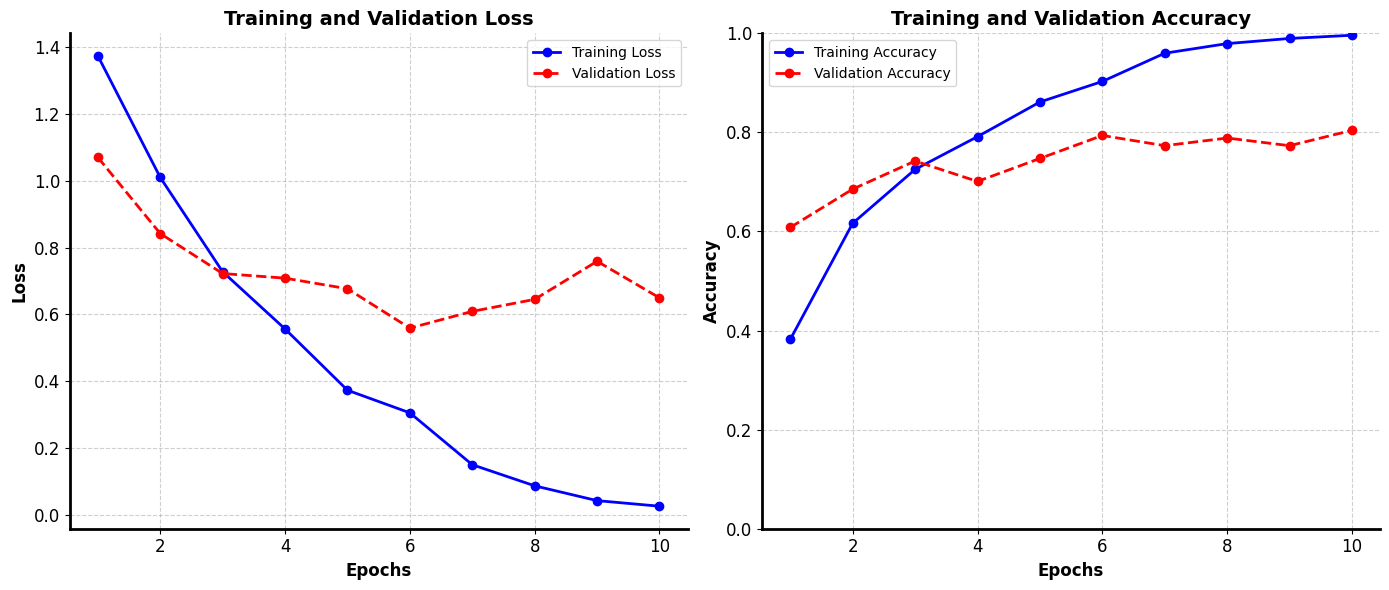

In [32]:
# Extract training history data
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Create a figure with 2 subplots: one for loss and one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Loss
axs[0].plot(epochs_range, loss, label='Training Loss', color='b', marker='o', linestyle='-', linewidth=2)
axs[0].plot(epochs_range, val_loss, label='Validation Loss', color='r', marker='o', linestyle='--', linewidth=2)
axs[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axs[0].legend()
axs[0].grid(True, linestyle='--', alpha=0.6)

# Plotting Accuracy
axs[1].plot(epochs_range, acc, label='Training Accuracy', color='b', marker='o', linestyle='-', linewidth=2)
axs[1].plot(epochs_range, val_acc, label='Validation Accuracy', color='r', marker='o', linestyle='--', linewidth=2)
axs[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Epochs', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Accuracy', fontsize=12, fontweight='bold')
axs[1].set_ylim(0, 1)
axs[1].legend()
axs[1].grid(True, linestyle='--', alpha=0.6)

# Make sure to bold the ticks and gridlines
for ax in axs:
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    
# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('training_loss_accuracy.png', dpi=300)
plt.show()
